In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def imshow(img):
    plt.figure(figsize=(10, 7))
    plt.imshow(img[:,:,::-1])

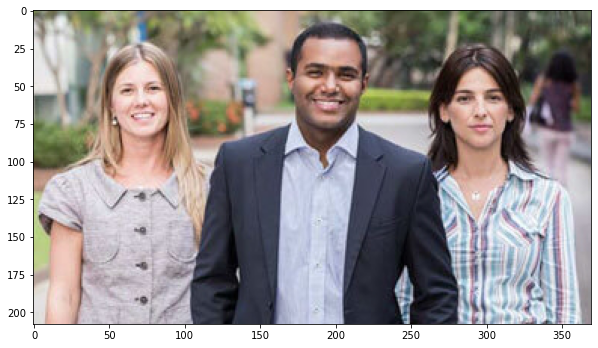

In [3]:
image = cv2.imread('img/people2.jpg');
imshow(image)

3


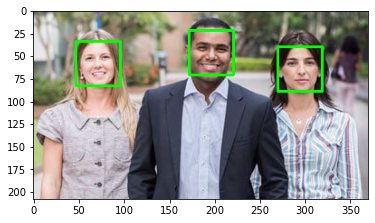

In [18]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> 
# Haarcascades/haarcascade_frontalface_default.xml
img_copy = image.copy()
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(gray, scaleFactor=2.04, minNeighbors=5, flags=0, minSize=(1, 1), maxSize=(50, 50))

# If no faces detected print("No faces found")
'''When no faces detected, face_classifier returns and empty tuple'''
if len(faces) < 1:
    print("No faces found")

# Otherwise draw a rectangle on each face that has been detected
'''We iterate through our faces array and draw a rectangle over each face in faces'''
for (x,y,w,h) in faces:
     new_img = cv2.rectangle(img_copy, (x,y), (x+w,y+h), (0, 255, 0), 2)

new_img = new_img[:,:,::-1]
plt.imshow(new_img)
    


In [5]:
# Repeat the process above with your own images


In [6]:
# Now do the same but this time also detect eyes in the faces using -> Haarcascades/haarcascade_eye.xml


In [7]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
